<a href="https://colab.research.google.com/github/tae898/DeepLearning/blob/master/Chapter03_Probability_and_Information_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Why Probability?

In [ ]:
import numpy as np

Let's test frequentist probability!

In [ ]:
def toss_coin():
    """Toss a coin which either gives you the heads (True) or tails (False)."""
    if np.random.random_sample() < 0.5:
        return True
    else:
        return False

Below lines of code show you that if we repeated the experiment (e.g., tossing a coin) inﬁnitely many times, then a proportion of the repetitions would result in that outcome.

In [ ]:
results = [toss_coin() for i in range(10)]
sum(results)/ len(results)

0.6

In [ ]:
results = [toss_coin() for i in range(100)]
sum(results)/ len(results)

0.47

In [ ]:
results = [toss_coin() for i in range(1000)]
sum(results)/ len(results)

0.499

In [ ]:
results = [toss_coin() for i in range(10000)]
sum(results)/ len(results)

0.5049

In [ ]:
results = [toss_coin() for i in range(100000)]
sum(results)/ len(results)

0.49819

The most important thing to remember in this section is the following setnence from the book.

> *If we list several properties that we expect common sense reasoning about uncertainty to have, then the only way to satisfy those properties is to treat Bayesian probabilities as behaving exactly the same as frequentist probabilities.*



# 3.2 Random Variables

In [1]:
import numpy as np

Let's create a simple discrete random variable $\mathrm{x}$. $\mathrm{x}$ can take $-0.1, 0, 2,$ and $10.2$. Their probabilities are $0.1, 0.5, 0.25$, and $0.15$, respectively.

In [2]:
def sample_simple_discrete():
    randnum = np.random.random_sample()

    if randnum < 0.1:
        return -0.1
    elif randnum < 0.1 + 0.5:
        return 0
    elif randnum < 0.1 + 0.5 + 0.25:
        return 2
    else:
        return 10.2

Now the function we have defined above will sample a value from the discrete random variable $\mathrm{x}$


In [3]:
sample_simple_discrete()

2

Let's see if repeating the sampling actually shows that it's sampling from the distribution that we've defined.

In [4]:
def get_probs(num_sampling):
    sampled = [sample_simple_discrete() for i in range(num_sampling)]

    probs = [sampled.count(x_) / len(sampled) for x_ in [-0.1, 0, 2, 10.2]]

    return probs

In [5]:
get_probs(10)

[0.1, 0.3, 0.4, 0.2]

In [6]:
get_probs(100)

[0.06, 0.53, 0.27, 0.14]

In [7]:
get_probs(1000)

[0.083, 0.498, 0.247, 0.172]

In [8]:
get_probs(10000)

[0.0958, 0.5062, 0.2481, 0.1499]

Note that this was just a toy example. No one does such a thing.

# 3.3 Probability Distributions

In [9]:
import numpy as np

There are several useful probability distributions that we use in machine learning. One of the most used and most easy is uniform probability distribution, which I have used a lot in above sections.

Below is a function that samples values from the uniform distribution where the domain of the variable is $[0, 1)$ 

In [10]:
x_sampled = np.random.random_sample()
x_sampled

0.8241459369168749

You can also sample multiple times at once 

In [11]:
x_sampled = np.random.random_sample(size=10)
x_sampled

array([0.54700592, 0.53498258, 0.4264905 , 0.10551716, 0.26612071,
       0.81966571, 0.97319834, 0.79167363, 0.80519333, 0.81828559])

You can sample from the uniform distribution whose domain interval is $[a, b)$, by simply multiplying $(b - a)$ with the sampled value and adding $a$ to it.


In [12]:
# e.g., a=1, b=3
a = 1
b = 3

x_sampled = (b - a) * np.random.random_sample() + a
x_sampled

1.8888090116586211

Let's sample many times and plot the histogram to see if the source distribution is indeed the uniform distribution that we expected.

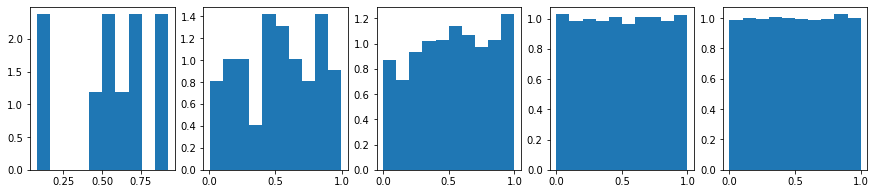

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for idx, size in enumerate([10, 100, 1000, 10000, 100000]):
    x_sampled = np.random.random_sample(size=size)
    axs[idx].hist(x_sampled, density=True);

# 3.4 Marginal Probability

I was trying to make a good python example for this section but I can't really do it cuz we normally explain the concept of marginal probability analytically with a pen and paper.

# 3.5 Conditional Probability

I was trying to make a good python example for this section but I can't really do it cuz we normally explain the concept of marginal probability analytically with a pen and paper.

# 3.6 The Chain Rule of Conditional Probabilities

I was trying to make a good python example for this section but I can't really do it cuz we normally explain the concept of marginal probability analytically with a pen and paper.

# 3.7 Independence and Conditional Independence

I was trying to make a good python example for this section but I can't really do it cuz we normally explain the concept of marginal probability analytically with a pen and paper.

# 3.8 Expectation, Variance and Covariance

In [14]:
import numpy as np

The reason why I keep saying that it's not so easy to make good python examples of this chapter is that often times we prove and show analytically how probability and statistics work. 

With a pen and paper, I can just write down any probability distribution, and from them I can prove and show how stuffs work. The thing with computers is that we can only sample from such distributions and play with the sampled values.

For example, let's take the uniform distribution again where the domain of the
random variable $\mathrm{x} $is $[0, 1)$. Obviously $\mathrm{E}[\mathrm{x}]$ is $0.5$, since $\int_0^1f_X(x)xdx$ equals $0.5$.

This gets tricky with computers since as I said we can only deal with the 
sampled values from it.


In [15]:
x_sampled = np.random.random_sample(10000)
x_sampled.mean()

0.5050376234813162

As you see from the above cell, the mean value of the sampled values is never exactly 0.5, since it's not the analytical expectation but the mean of the sampled values, which is empirical. 

This doesn't mean that this is a problem. With enough sampling, the stats we get from them get very close to the analytical ones anyways.

Let's try getting the expectation of $\mathrm{x}^2$. The analytical value obtained with integral will give you $1/3$

In [16]:
x_sampled_squared = x_sampled ** 2
x_sampled_squared.mean()

0.3378629246873562

$\mathrm{Var}[\mathrm{x}]$ can be computed using the equation

In [21]:
var_x = ((x_sampled - x_sampled.mean())**2).mean()
var_x

0.08279992355570037

Or numpy's built in function.

In [22]:
var_x = x_sampled.var()
var_x

0.08279992355570037

The standard deviation of $\mathrm{x}$, which is $\sqrt{\mathrm{Var}[\mathrm{x}]}$, can be computed using the equation

In [25]:
std_x = np.sqrt(((x_sampled - x_sampled.mean())**2).mean())
std_x

0.2877497585675796

Or numpy's built in function.

In [26]:
var_x = x_sampled.var()
std_x = np.sqrt(var_x)
std_x

0.2877497585675796

Let's see if the expectation of two variables is indeed an linear operation.

In [27]:
x_sampled = np.random.random_sample(10000)
y_sampled = (3 - 1) * np.random.random_sample(10000) + 1

alpha = -1
beta = 5.1

Below two equations should result in the same value.

In [28]:
np.mean(alpha * x_sampled + beta * y_sampled), \
alpha * np.mean(x_sampled) + beta * np.mean(y_sampled)

(9.657759352599205, 9.657759352599204)

If we just sample from $\mathrm{x}$ and $\mathrm{y}$ as below, then we are sampling from two independent distributions. Then of course the covariance will be $0$.

In [29]:
x_sampled = np.random.random_sample(10000)
y_sampled = (3 - 1) * np.random.random_sample(10000) + 1

$\mathrm{Var}[\mathrm{x}]$ and $\mathrm{Var}[\mathrm{y}]$

In [31]:
x_sampled.var(), y_sampled.var()

(0.08367313862385113, 0.3314877103332269)

$\mathrm{Cov}[\mathrm{x}]$ and $\mathrm{Cov}[\mathrm{y}]$

In [33]:
cov_xy = ((x_sampled - x_sampled.mean()) * (y_sampled - y_sampled.mean())).mean()
cov_xy

-0.0014878685403607627

Or just use the built-in numpy function. The docstring of `numpy.cov()` says that the data should be arranged as A 1-D or 2-D array containing multiple variables and observations. Each row of m represents a variable, and each column a single observation of all those variables.


Since we have two variables, x and y, and we sampled 10,000 times, the data should be of shape (2, 10000)

`np.cov()` actually computes the covariance matrix. Check if the elements of this matrix corresponds to the values we have computed above

In [34]:
data = np.stack([x_sampled, y_sampled])
Cov_xy = np.cov(data)
Cov_xy

array([[ 0.08368151, -0.00148802],
       [-0.00148802,  0.33152086]])

Remember that the Covariance matrices are symmetrical.


In [35]:
Cov_xy.T

array([[ 0.08368151, -0.00148802],
       [-0.00148802,  0.33152086]])

This time let's compute correlation. When we talk about correlation, we normally mean Pearson correlation coefficient.

In [36]:
corr_xy = ((x_sampled - x_sampled.mean()) * (y_sampled - y_sampled.mean())).mean() / (x_sampled.std() * y_sampled.std())
corr_xy

-0.008933832696682862

Or we can just get the correlation matrix using the numpy builtin function Note that the correlation of a random variable and itself is always 1, since it's calculated as the variance divided by the square of the standard deviation.

In [37]:
np.corrcoef(data)

array([[ 1.        , -0.00893383],
       [-0.00893383,  1.        ]])

## Example 1

Covariance and correlation are simple but very powerful tools. Although they only tell us the linear relationship between two variables, not non-linear, they are powerful and simple enough to do things like PCA or define multivariate (higher than one dimensional) probability distributions.

Let's take the boston house price as an example again that we used in Chapter2

In [38]:
from sklearn.datasets import load_boston
X_original = load_boston()['data']

X_original has 506 obervations with 13 features (13 variables)


In [39]:
X_original.shape

(506, 13)

If we want to compute the correlation matrix of this data using numpy, we need to transpose it first, since it expects the data to have the rows as variables and the columns as observations.


In [40]:
Corr_X = np.corrcoef(X_original.T)

The correlation between the variables show the linear relationship between them. Remember that the diagonal values are always 1

In [41]:
Corr_X.round(3)

array([[ 1.   , -0.2  ,  0.407, -0.056,  0.421, -0.219,  0.353, -0.38 ,
         0.626,  0.583,  0.29 , -0.385,  0.456],
       [-0.2  ,  1.   , -0.534, -0.043, -0.517,  0.312, -0.57 ,  0.664,
        -0.312, -0.315, -0.392,  0.176, -0.413],
       [ 0.407, -0.534,  1.   ,  0.063,  0.764, -0.392,  0.645, -0.708,
         0.595,  0.721,  0.383, -0.357,  0.604],
       [-0.056, -0.043,  0.063,  1.   ,  0.091,  0.091,  0.087, -0.099,
        -0.007, -0.036, -0.122,  0.049, -0.054],
       [ 0.421, -0.517,  0.764,  0.091,  1.   , -0.302,  0.731, -0.769,
         0.611,  0.668,  0.189, -0.38 ,  0.591],
       [-0.219,  0.312, -0.392,  0.091, -0.302,  1.   , -0.24 ,  0.205,
        -0.21 , -0.292, -0.356,  0.128, -0.614],
       [ 0.353, -0.57 ,  0.645,  0.087,  0.731, -0.24 ,  1.   , -0.748,
         0.456,  0.506,  0.262, -0.274,  0.602],
       [-0.38 ,  0.664, -0.708, -0.099, -0.769,  0.205, -0.748,  1.   ,
        -0.495, -0.534, -0.232,  0.292, -0.497],
       [ 0.626, -0.312,  0.595, 

Sometimes we also like to plot them as an image to have a better visualized overview.

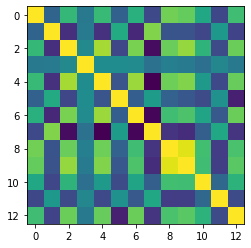

In [42]:
import matplotlib.pyplot as plt
plt.imshow(Corr_X);

We can see that the 8th and the 9th (starting from 0th) features (variables) have high correlation.

In [43]:
Corr_X[8, 9]

0.9102281885331835

Let's plot the their raw values and visualize them.

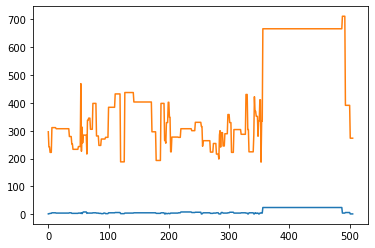

In [44]:
var_8 = X_original[:, 8]
var_9 = X_original[:, 9]

plt.plot(var_8);
plt.plot(var_9);

It's hard to see their correlation since their scales are very different. In this case we can z-scale them.

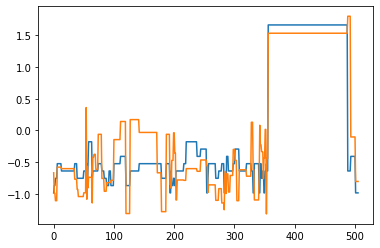

In [45]:
var_8_ = (var_8 - var_8.mean()) / var_8.std()
var_9_ = (var_9 - var_9.mean()) / var_9.std()

plt.plot(var_8_);
plt.plot(var_9_);

Now we can clearly see the correlation! They actually move along similarly.

Remember what was said in the book. If two variables are independent, then their covariance (correlation) is zero. If their correlation is not 0, then they are dependent. So in this example, we can say that the variable 8 and 9 are indeed dependent.

## Example 2

Often times when you collect data from the real world (e.g. sensors) many features are linearly correlated with each other and thus dependent on each other. Even RGB channels are correlated with each other. I'll open a sample image.


![Tae](https://raw.githubusercontent.com/tae898/DeepLearning/master/data/Tae.png)


Run some unix shell commands to remove the existing images and download the image.

In [49]:
!rm Tae*
!wget https://raw.githubusercontent.com/tae898/DeepLearning/master/data/Tae.png

--2020-07-23 09:49:18--  https://raw.githubusercontent.com/tae898/DeepLearning/master/data/Tae.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215413 (210K) [image/png]
Saving to: ‘Tae.png’

Tae.png             100%[===================>] 210.36K  --.-KB/s    in 0.03s   

2020-07-23 09:49:18 (6.92 MB/s) - ‘Tae.png’ saved [215413/215413]



opencv to read the image from disk

In [50]:
import cv2

img_BGR = cv2.imread('Tae.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

Below lines show how much of correlation there is among the channels.

In [53]:
channel_R = img_RGB[:,:,0].flatten()
channel_B = img_RGB[:,:,1].flatten()
channel_C = img_RGB[:,:,2].flatten()

data_RGB = np.stack([channel_R, channel_B, channel_C])
data_RGB.shape

(3, 172272)

In [55]:
Corr_RGB = np.corrcoef(data_RGB)
Corr_RGB

array([[1.        , 0.96368862, 0.91644125],
       [0.96368862, 1.        , 0.98165787],
       [0.91644125, 0.98165787, 1.        ]])

You can see that the three RGB channels are highly linearly correlated

Linearly transforming the data from the RGB color space to the [YCoCg color space](https://en.wikipedia.org/wiki/YCoCg) can somewhat decorrelate the channels.

In [56]:
RGB2YCoCg = np.array([[1/4,     1/2,    1/4],
                      [1/2,     0,      -1/2],
                      [-1/4,    1/2,    -1/4]])

YCoCg2RGB = np.linalg.inv(RGB2YCoCg)

data_YCoCg = RGB2YCoCg @ data_RGB

Corr_YCoCg = np.corrcoef(data_YCoCg)
Corr_YCoCg

array([[ 1.        ,  0.53838837,  0.63563295],
       [ 0.53838837,  1.        , -0.04898877],
       [ 0.63563295, -0.04898877,  1.        ]])

From the correlation matrix you can see that the correlation between the variables is not as high.

Using this intuition, we can create an "*encoder*" matrix that only keeps the two channels (Y and Co)

In [57]:
Encoder = RGB2YCoCg[:2, :]
Decoder = YCoCg2RGB[:, :2]

Note the shapes!


In [58]:
Encoder.shape, Decoder.shape

((2, 3), (3, 2))

Compress the data from 3 channels to 2.

In [59]:
data_compressed = Encoder @ data_RGB
data_RGB.shape, data_compressed.shape

((3, 172272), (2, 172272))

Now let's reconstruct the data using the Decoder!

In [60]:
data_reconstructed = Decoder @ data_compressed
data_reconstructed.shape

(3, 172272)

We have to reshape the matrix into the original image shape.

In [62]:
R_reconstructed = data_reconstructed[0, :].reshape(444, 388)
G_reconstructed = data_reconstructed[1, :].reshape(444, 388)
B_reconstructed = data_reconstructed[2, :].reshape(444, 388)

We also have to clip the values that are not between 0 and 255.


In [63]:
R_reconstructed[R_reconstructed < 0] =0
R_reconstructed[R_reconstructed > 255] =255
G_reconstructed[G_reconstructed < 0] =0
G_reconstructed[G_reconstructed > 255] =255
B_reconstructed[B_reconstructed < 0] =0
B_reconstructed[B_reconstructed > 255] =255

img_reconstructed = np.stack([R_reconstructed, G_reconstructed, B_reconstructed], -1)

We also have to convert the type from float to unsigned 8 bit integer.

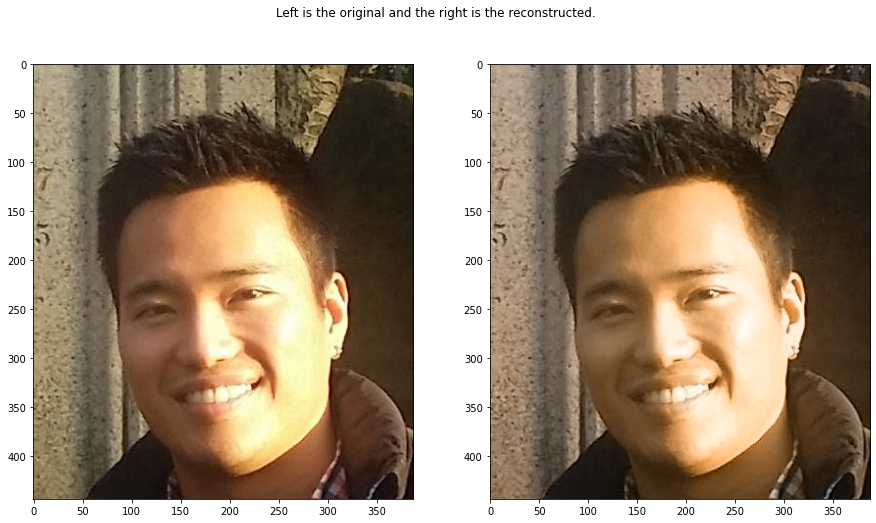

In [64]:
img_reconstructed = img_reconstructed.astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8));

fig.suptitle('Left is the original and the right is the reconstructed. ')
ax1.imshow(img_RGB);
ax2.imshow(img_reconstructed);

This was just a toy example of encoding and decoding data using the linear algebra that we have learned so far.

Of course no one does encoding-decoding this way. When you save RGB images from the memory to disc (e.g. as a jpg format), it uses a much more sophisticated algorithm to encode data (see [how JPEG is done](https://en.wikipedia.org/wiki/JPEG), for example)

Later on we will even learn encoding-decoding using neural networks!

What I wanted to show here is that real world data has features that are linearly correlated and simple linear transformation can encode / decode them.

# 3.9 Common Probability Distributions

In [65]:
import numpy as np

## 3.9.1 Bernoulli distribution

I couldn't find bernoulli from numpy so I will import it from scipy.

In [66]:
from scipy.stats import bernoulli

Let's say $P(\mathrm{x}=1) = p$. This is the parameter you have to specify to use bernoulli.


In [67]:
p = 0.3

Let's sample 100000 from the distribution and see if the expectation and the variance are close to the analytical ones.

In [68]:
samples = bernoulli.rvs(p, size=100000)

The expectation should be $p = 0.3$.

In [69]:
samples.mean()

0.29928

The variance should be $p(1-p) = 0.3\times0.7 = 0.021$


In [70]:
samples.var()

0.20971148160000005

## Binomial distribution

I couldn't find binomial from numpy so I will import it from scipy.

In [71]:
from scipy.stats import binom

[A helpful explanation](https://en.wikipedia.org/wiki/Binomial_distribution#Bernoulli_distribution)
 

The Bernoulli distribution is a special case of the binomial distribution, where $n = 1$.

For this distribution we have to specify two parameters $n$ and $p$. $p$ can be considered the same thing as bernoulli and $n$ is the number of bernoulli trials.


In [73]:
n = 10
p = 0.3

Let's sample 100000 samples from the distribution

In [74]:
samples = binom.rvs(n, p, size=100000)

Below line will print the unique observations of the samples. There should be 11 unique obervations since we wet n to 10 and therefore the possible values of $k$ is $0, 1, ..., 9, 10$.

In [75]:
set(samples)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [76]:
import matplotlib.pyplot as plt

Let's plot the histogram of the samples to see the possible values of the random variable and how many observations were realized.

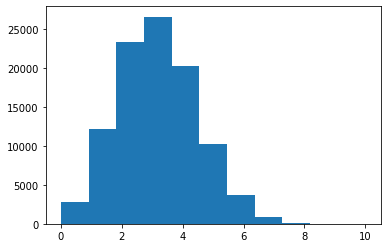

In [77]:
plt.hist(samples, bins=11);

The histogram look a lot like the pdf of a Gaussian!

Plotting the histogram of sampled values from a certain probability distribution is equilvalent to plotting the pdf or pmf of the distribution. As the number of samples get close to infinity, the histogram would look more like to the analytical pdf or pmf of it.

Let's also check if the expectation and the variance are close to the analytical ones.

The expectation should be $n\times p = 10\times0.3 = 3$

In [78]:
samples.mean()

2.99985

The variance should be $n \times p \times (1-p) = 10 \times 0.3 \times 0.7 = 2.1$

In [79]:
samples.var()

2.0884699775

## 3.9.2 Categorical distribution


[Categorical distribution on Wikipedia](https://en.wikipedia.org/wiki/Categorical_distribution) 

Categorical distribution, generalized Bernoulli distribution, and multinoulli distribution are the same thing.

The categorical distribution is the generalization of the Bernoulli distribution for a categorical random variable (i.e. for a discrete variable with more than two possible outcomes

As said in the book, computing the expectation or variance of multinoulli-distributed random variables is not necessary. I will show you this as an example below.

Let's say that $\mathrm{x}$ is a scalar random variable that follows a categorical distribution. $\mathrm{x}$ can take dog, cat, and monkey, and their probabilities are $0.2$, $0.5$, and $0.3$, respectively. 

For computation reasons we express "dog", "cat", and "monkey" into numbers, such as $0$, $1$, and $2$. 

In [80]:
px = np.array([0.2, 0.5, 0.3])
x = np.array([0, 1, 2])

In this case the expectation will be:


In [82]:
expectation_x = (x*px).sum() 
expectation_x

1.1

and the variance will be


In [83]:
variance_x = (((x -expectation_x)**2) * px).sum() 
variance_x

0.49

What if we give them different numbers, like, 

In [84]:
x = np.array([0, 1, 10])

just becuase I like monkeys a lot.

In this case the expectation will be:

In [85]:
expectation_x = (x*px).sum() 
expectation_x

3.5

and the variance will be


In [86]:
variance_x = (((x -expectation_x)**2) * px).sum() 
variance_x

18.25

Do the stats expectation and variance mean anything here? Not really, right? 

## Multinomial distribution

[Multinomial distribution on Wikipedia](https://en.wikipedia.org/wiki/Multinomial_distribution)

I will copy the first paragraphs of the wikipedia page,  Since it sums up really well what we have learned so far.

In probability theory, the multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for each side of a $k$-sided die rolled n times. For n independent trials each of which leads to a success for exactly one of $k$ categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

When $k$ is 2 and $n$ is 1, the multinomial distribution is the Bernoulli
distribution. 

When $k$ is 2 and $n$ is bigger than 1, it is the binomial distribution. 

When $k$ is bigger than 2 and $n$ is 1, it is the categorical distribution.

The Bernoulli distribution models the outcome of a single Bernoulli trial. In other words, it models whether flipping a (possibly biased) coin one time will result in either a success (obtaining a head) or failure (obtaining a tail). The binomial distribution generalizes this to the number of heads from performing n independent flips (Bernoulli trials) of the same coin. The multinomial distribution models the outcome of n experiments, where the outcome of each trial has a categorical distribution, such as rolling a $k$-sided dice n times.

In [87]:
from scipy.stats import multinomial

Below function samples from the multinomial distribution. We have to specify $n$ and $\pmb{p}$, where $n$ is a scalar and $\pmb{p}$ is a vector of probs. Obviously the sum of elements in $\pmb{p}$ should be 1.

In [88]:
n = 10
p = np.array([0.1, 0.2, 0.5, 0.2])
size = 100000

The length of vector $\pmb{p}$ is the value of $k$.

In [89]:
k = len(p)
k

4

Let's sample 100000 from the distribution.

In [90]:
samples = multinomial.rvs(n, p, size)

The sample has 100000 rows (observations) and 4 columns (counts per each category)

In [91]:
samples.shape

(100000, 4)

The expectation per category should be $np_i$, which should be

In [93]:
expectation_x = n*p
expectation_x

array([1., 2., 5., 2.])

Let's see if they match our stats from the samples.


In [94]:
expectation_x = samples.mean(axis=0)
expectation_x

array([0.99406, 2.00554, 4.99832, 2.00208])

The variance per category should be $np_i(1-p_i)$, which should be

In [95]:
variance_x = n * p * (1-p)
variance_x

array([0.9, 1.6, 2.5, 1.6])

Let's see if they match our stats from the samples.

In [96]:
variance_x = samples.var(axis=0)
variance_x

array([0.89030472, 1.58778931, 2.49539718, 1.59867567])

The shape of the covariance matrix for this distribution should be 4 by 4 since $k=4$. Let's get the analytical value of the covariance matrix.


In [98]:
Cov_x = -n * p.reshape(-1, 1) @ p.reshape(1, -1)
np.fill_diagonal(Cov_x, n * p * (1-p))

Cov_x

array([[ 0.9, -0.2, -0.5, -0.2],
       [-0.2,  1.6, -1. , -0.4],
       [-0.5, -1. ,  2.5, -1. ],
       [-0.2, -0.4, -1. ,  1.6]])

Let's see if they match our stats from the samples.


In [99]:
Cov_x = (samples - expectation_x).T @ (samples - expectation_x) / size
Cov_x

array([[ 0.89030472, -0.19782709, -0.49507998, -0.19739764],
       [-0.19782709,  1.58778931, -0.99450069, -0.39546152],
       [-0.49507998, -0.99450069,  2.49539718, -1.00581651],
       [-0.19739764, -0.39546152, -1.00581651,  1.59867567]])

Let's recap!



This is a Bernoulli distribution.

In [100]:
n = 1
p = np.array([0.3, 0.7])
size = 100000
samples = multinomial.rvs(n, p, size)[:,0]
samples.mean(), samples.var()

(0.30077, 0.21030740709999995)

This is a Binomial distribution.

In [101]:
n = 10
p = np.array([0.3, 0.7])
size = 100000
samples = multinomial.rvs(n, p, size)[:,0]
samples.mean(), samples.var()

(2.99624, 2.1095458624)

This is a Categorical distribution.

In [102]:
n = 1
p = np.array([0.2, 0.5, 0.3])
size = 100000
samples = multinomial.rvs(n, p, size)

expectation = (samples.mean(axis=0) * np.array([0, 1, 2])).sum()
variance = (samples.mean(axis=0) * np.array([0, 1, 2])**2).sum() - expectation**2

expectation, variance

(1.1043500000000002, 0.48672107749999993)

## 3.9.3 Gaussian Distribution

![Tae, next to his friend whose face is Gaussian-blured, is in front of the grave of Carl Friedrich Gauss, in 2015 winter](https://raw.githubusercontent.com/tae898/DeepLearning/master/data/gauss.jpg)

The Gaussian distribution is the most popular distribution used in science and engineering. One dude even had to visit the grave of Gauss to understand the gravity of it.

In [103]:
import numpy as np

Let's sample 100000 samples from the standard normal distribution whose mean and std is 0 and 1, respectively.

In [104]:
size = 100000
samples = np.random.standard_normal(size)

As said above, the histogram of samples can show the pmf or pdf of the source distribution.

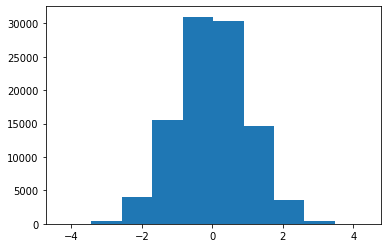

In [105]:
plt.figure();
plt.hist(samples);

Let's increase the number of bins to get a fine grained histogram

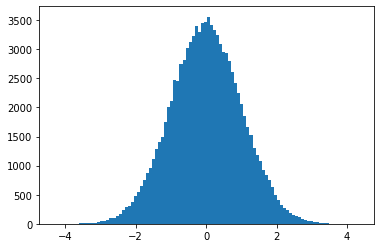

In [106]:
plt.figure();
plt.hist(samples, bins=100);

Let's see if the empirical mean and the standard deviation actually are close to 0 and 1, respectively.

In [107]:
samples.mean()

0.0007508374465830691

In [108]:
samples.std()

0.9984360779488768

### Example 1

A lot of data we observe come from the combination of many different random variables. According to the central limit theorem, we can then say that the observed data likely follows a Gaussian distribution.

This time we will load the breast cancer dataset from scikit learn.

In [109]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()['data']

`DESCR` show what each variable means.


In [111]:
features = load_breast_cancer()['DESCR']
features

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

The data has 569 observations with 30 variables

In [112]:
data.shape

(569, 30)

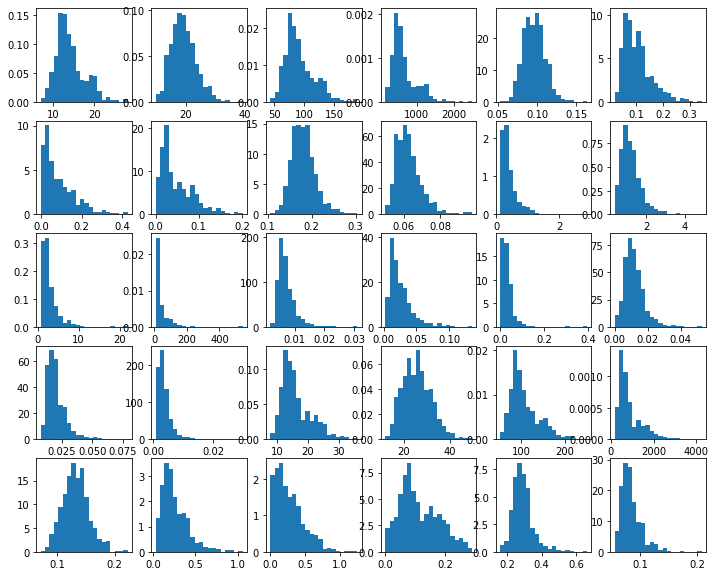

In [113]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 6, figsize=(12, 10));

for i, rows in enumerate(axs):
    for j, ax in enumerate(rows):
        ax.hist(data[:, i*6 + j], bins=20, density=True);

They indeed all look like Gaussian distributions!

Remember, for a univariate Gaussian pdf, we only need two parameters, mean and the variance, to define the function. So what we can try here is that every feature of this data comes from a univaraite Gaussian distribution.

Below two lines compute the mean and std per variable.

In [114]:
means = [column.mean() for column in data.T]
stds = [column.std() for column in data.T]

There should be 30 of them.

In [115]:
len(means), len(stds)

(30, 30)

In [116]:
import numpy as np

Each pair of mean and std allows us to construct the pdf of the Gaussian and sample values from it.

In [117]:
size = 100000
samples_all = [np.random.normal(means[i], stds[i], size) 
               for i in range(len(data.T))]

Now let's plot the histograms of them to see if they look like those from the real observed data!

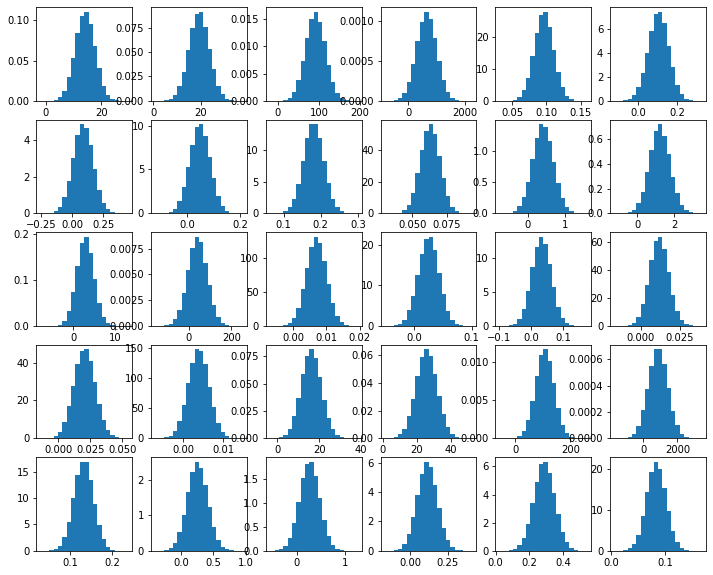

In [118]:
fig, axs = plt.subplots(5, 6, figsize=(12, 10));

for i, rows in enumerate(axs):
    for j, ax in enumerate(rows):
        ax.hist(samples_all[i*6 + j], bins=20, density=True);

Well yeah kinda but not really ...

### Multivariate Gaussian Distribution



In reality, we use the multivariate Gaussian distribution more often than the one-dimensional one. It's nice that we can just use 1d histograms to see the pmfs or pdfs of one-dimensional distributions, but in reality observations are highly dimensional.

Even the toy example we used above has 30 dimensions. If we really want to fit a Gaussian distribution to the data, fitting every dimension separately to a one-dimensional Gaussian distribution like we kinda did above is probably not a good idea.

Below cells closely follow [the numpy page](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) 

In [119]:
import matplotlib.pyplot as plt
import numpy as np

size = 100000

Let's say we have two independent probability distributions.

random variable $\mathrm{x}$ follows distribution 1

In [120]:
mean_x = 0
var_x = 1
std_x = np.sqrt(var_x)

sample from the distribution

In [121]:
x = np.random.normal(mean_x, std_x, size)

random variable $\mathrm{y}$ follows distribution 2

In [122]:
mean_y = 0
var_y = 0.5
std_y = np.sqrt(var_y)

sample from the distribution

In [123]:
y = np.random.normal(mean_y, std_y, size)

random variable $\mathrm{x}$ and $\mathrm{y}$ are independent. Therefore their covariance should be zero. If we plot them together as a scatter plot, it will show us visually that they are not correlated (Remember, if two random variables are independent, then they are not correlated (covariance is 0))

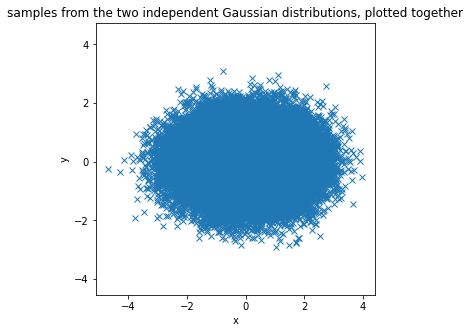

In [124]:
plt.figure(figsize=(5, 5));
plt.title('samples from the two independent Gaussian distributions, plotted together');
plt.plot(x, y, 'x');
plt.axis('equal');
plt.xlabel('x');
plt.ylabel('y');

This time let's plot their histograms separately, to see that they look like their pdfs.

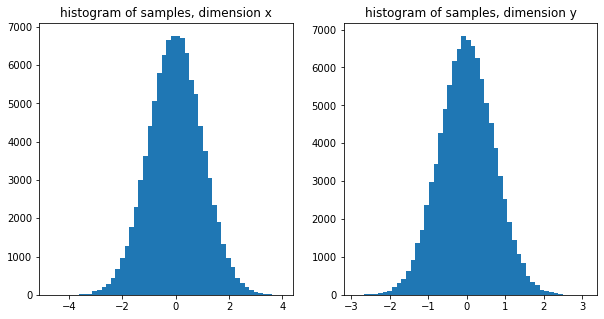

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
axs[0].hist(x, bins=50);
axs[0].set_title('histogram of samples, dimension x');

axs[1].hist(y, bins=50);
axs[1].set_title('histogram of samples, dimension y');

And they do!

In reality, variables (features) are correlated (their covariance is not zero.) and thus they are dependent on each other. The multivariate Gaussian distribution can cope with this situation since it uses the covariance matrix of the variables!

Let's sample from the below multivariate Gaussian distribution.

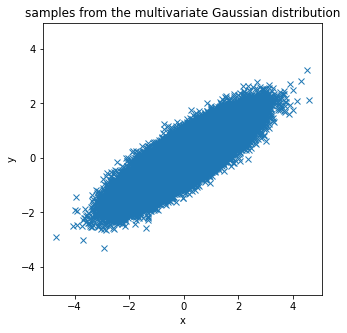

In [127]:
size = 100000
mean = np.array([0, 0])
cov = np.array([[1, 3/5],
                [3/5, 0.5]])

x, y = np.random.multivariate_normal(mean, cov, size).T

plt.figure(figsize=(5, 5));
plt.title('samples from the multivariate Gaussian distribution')
plt.plot(x, y, 'x');
plt.axis('equal');
plt.xlabel('x');
plt.ylabel('y');

It's clear that they are correlated. This happens because off-the-diagonal values of the covariance are not zero (they are 3/5). If they are set to 0, then they will look like the plot from the two cells above.

This time let's plot their histograms separately

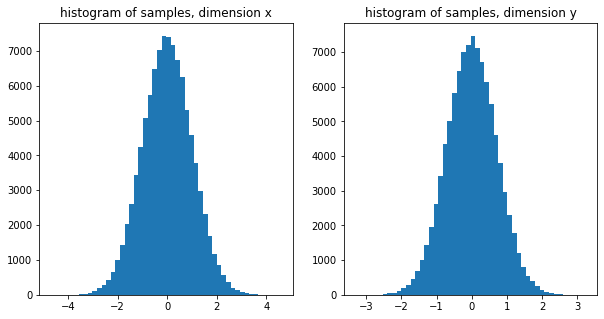

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
axs[0].hist(x, bins=50);
axs[0].set_title('histogram of samples, dimension x');
axs[1].hist(y, bins=50);
axs[1].set_title('histogram of samples, dimension y');

They look the same as the histograms before. This is because plotting a 1d histogram doesn't account for the other variables. Just looking at these two histograms, there is no way we can tell they are correlated or not. 

Let's load the breast cancer dataset from scikit learn again for practice.

In [129]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()['data']

The data has 569 observations with 30 variables

In [130]:
data.shape

(569, 30)

We can 'fit' a multivariate Gaussian distribution to the data, simply by calculating the mean vector and the covariance matrix from the data. We've done this so many times now. It should be easy by now.

Always remember to check the shape of the structured data (i.e. is row the observations or features?).

In [131]:
mean = data.mean(axis=0)
cov = np.cov(data.T)

Now we can sample data from the distribution!

sampling one observation from the distribution

In [132]:
sample = np.random.multivariate_normal(mean, cov, 1).flatten()
sample

array([ 1.07593321e+01,  1.24612938e+01,  6.58405664e+01,  3.05685452e+02,
        1.02025602e-01, -3.36493665e-03, -3.52119372e-02,  5.90271748e-03,
        1.52855957e-01,  5.79599258e-02, -7.83347449e-02,  4.29992635e-01,
       -1.05103057e+00, -1.74634989e+01,  6.05668674e-03, -2.34159111e-02,
       -2.11978602e-02, -2.45820938e-03,  1.87697283e-02, -2.45525732e-03,
        9.49802237e+00,  1.68896342e+01,  5.91577518e+01,  7.95000329e+01,
        1.45538937e-01,  7.21517140e-03, -7.47047500e-02,  2.38897909e-02,
        2.87892536e-01,  5.65629594e-02])

The sample should be a vector whose length is 30. The original data had 30 dimensions and we fit a multivariate Gaussian distribution to it. So this distribution can only generate the type of data that it has only seen before. 

In [133]:
sample.shape

(30,)

Can we really say this distribution really can generate realistic breast cancer data? Hmm... This is what we will learn later on in this book.

## 3.9.4 Exponential and Laplace Distributions